# Solving a Dynamic Programming Problem

In [319]:
import numpy as np
# import scipy 
from scipy.optimize import brentq    #equation solver
from scipy import optimize
from scipy.stats import norm
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import numpy.polynomial.chebyshev as chebyshev
import numba

## Value Function Iteration

In [101]:
alpha  = 0.33
beta   = 0.98
delta  = 0.13
A      = 2

@numba.njit
def f(k):
    return A*k**alpha + (1-delta)*k
@numba.njit
def fk(k):
    return A*alpha*k**(alpha-1) + (1-delta)

@numba.njit
def util(c):
    return np.log(c)

In [102]:
kstar = ((1/beta - 1 + delta)/A/alpha)**(1/(alpha-1))
kstar

9.091084887868014

In [103]:
assert np.isclose(beta*fk(kstar), 1)

In [193]:
# polynomial approximation of Value function
N = 6
# grid
k = np.linspace(0.01, 15, 300)

In [320]:
# Compute value function today
@numba.njit
def Vendog(kplus, k, Vplus):
        value = util(f(k) - kplus) + beta * Vplus
        return  value

# Backward iteration
@numba.njit
def backward_iterate(maxindex, V, k):
    for ik, k_cur in enumerate(k):
#         print("number on capital grid", ik)
        value = np.empty_like(k)
        
        for ik2, k_cur2 in enumerate(k):
            value[ik2] = Vendog(k[ik2], k_cur, V[ik2])
#         print(value)
        index         = np.argmax(value)
        maxindex[ik]  = index
        V[ik]     = value[index]
#         print("Value", V[ik])
    return maxindex, V

In [235]:
# Iteration algorithm
def ss_policy(k):
    maxindex = np.zeros_like(k)
    V    = np.zeros_like(k, dtype=float)
    for it in range(2000):
        maxindex, V = backward_iterate(maxindex, V, k)   
        if it % 10 == 1 and  np.linalg.norm(V - Vold) < 1E-20:
            print(f'convergence in {it} iterations!')
            return maxindex.astype(int), V
        #Fit value function for interpolation
        Vold = np.copy(V)
        
        

In [236]:
%time maxindex, V = ss_policy(k)

convergence in 1311 iterations!
CPU times: user 1.17 s, sys: 20.4 ms, total: 1.19 s
Wall time: 1.15 s


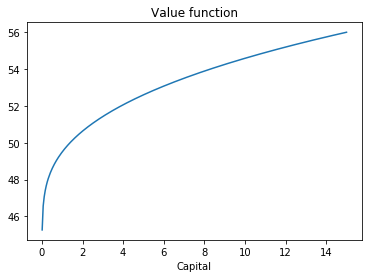

In [237]:
plt.plot(k, V)
plt.xlabel("Capital")
plt.title('Value function');

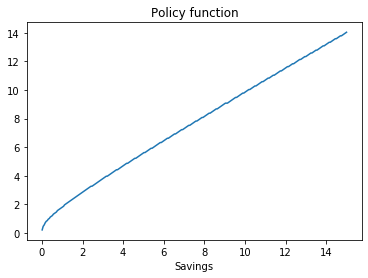

In [238]:
plt.plot(k, k[maxindex.astype(int)])
plt.xlabel("Capital")
plt.xlabel("Savings")
plt.title('Policy function');

In [201]:
## Steady state level of capital
kstar = k[k[maxindex] == k]
kstar

array([9.08421405])

In [207]:
@numba.njit
def policy_interp(x, k, maxindex):
    policy = np.interp(x, k, k[maxindex])
    return policy

@numba.njit
def timeseries(start, periods, k, maxindex):
    series = np.empty(periods)
    series[0] = start
    for t in range(periods-1):
        series[t+1]  = policy_interp(series[t], k, maxindex)
    return series


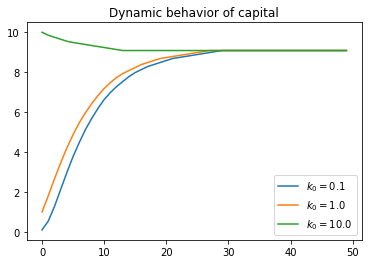

In [214]:
start = np.array([0.1, 1, 10])
T = 50

for element in start:
    series = timeseries(element, T, k, maxindex)
    plt.plot(range(T), 
    series, label=r'$k_0 = {j} $'.format(j=element))
plt.legend()
plt.title('Dynamic behavior of capital');

This model predicts rapid convergence of capital towards the steady state over the medium run. 

### Howard policy improvement

In [315]:
# Howard Value iteration for given policy
def howard_ss_value(kplus, k, V):
    for it in range(2000):
        V_update = util(f(k) - kplus) + beta * V
#         print(V_update)
        if it % 10 == 1 and  np.linalg.norm(V_update - V) < 1E-10:
            print(f'Howard convergence in {it} iterations!')
            return V_update
        #Fit value function for interpolation
        V = np.copy(V_update)

# Backward iteration

def backward_iterate_howard(maxindex, V, k):
    for ik, k_cur in enumerate(k):
#         print("number on capital grid", ik)
        value = np.empty_like(k)
        
        for ik2, k_cur2 in enumerate(k):
            value[ik2] = Vendog(k[ik2], k_cur, V[ik2])
#         print(value)
        index         = np.argmax(value)
        maxindex[ik]  = index
        V[ik]         = value[index]
        print(V[ik])
        V[ik]         = howard_ss_value(k[index], k_cur, V[ik]) 
#         print("Value", V[ik])
    return maxindex, V

In [316]:
# Iteration algorithm
def ss_policy_howard(k):
    maxindex = np.zeros_like(k)
    V     = np.zeros_like(k, dtype=float)
    for it in range(2000):
        maxindex, V = backward_iterate_howard(maxindex, V, k)   
        if it % 10 == 1 and  np.linalg.norm(V - Vold) < 1E-10:
            print(f'convergence in {it} iterations!')
            return maxindex.astype(int), V
        #Fit value function for interpolation
        Vold = np.copy(V)

In [317]:
%time maxindex_howard, V_howard = ss_policy_howard(k)

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


KeyboardInterrupt: 

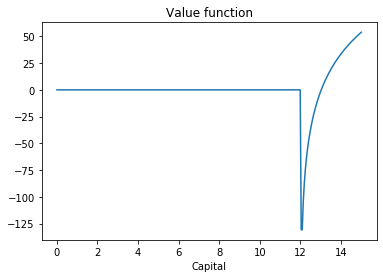

In [292]:
plt.plot(k, V_howard)
plt.xlabel("Capital")
plt.title('Value function');

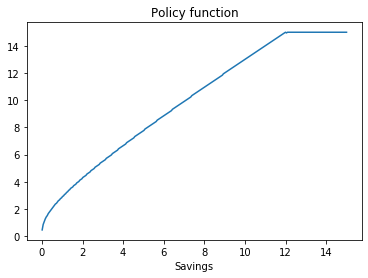

In [293]:
plt.plot(k, k[maxindex_howard.astype(int)])
plt.xlabel("Capital")
plt.xlabel("Savings")
plt.title('Policy function');

In [ ]:
def chebyshev_nodes(xlow, xhigh, N):
    standard_nodes = -np.cos((2*np.arange(1, N+1)-1)/(2*N)*np.pi)
    x = xlow + (xhigh-xlow)/2*(1+standard_nodes)
    return x
k = chebyshev_nodes(0.01, 15, 100)

# Iteration algorithm
def ss_policy(k):
    kplus = 0.7*k
    V     = np.zeros_like(k)
    q     = np.zeros_like(k)     # initialize with zeros 
    for it in range(2000):
        kplus, V = backward_iterate(kplus, V, k, q)
        if it % 10 == 1:
            print('Iteration number', it)
            print('Residual is', np.abs(V - Vold))
        
        if it % 10 == 1 and  np.max(np.abs(V - Vold)) < 1E-5:
            print(f'convergence in {it} iterations!')
            return kplus, V
        #Fit value function for interpolation
        q = chebyshev.chebfit(k, V, N)
        Vold = V
        